# Import libraries and Data cleaning

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv(r'/Users/lih-anhsu/Desktop/Sample_Project/Bill Voting Result/TEST.csv')

In [3]:
df.head()

,name,party,state,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    100 non-null    object 
 1   party   100 non-null    object 
 2   state   100 non-null    object 
 3   1       100 non-null    float64
 4   2       100 non-null    float64
 5   3       100 non-null    float64
 6   4       100 non-null    float64
 7   5       100 non-null    float64
 8   6       100 non-null    float64
 9   7       100 non-null    float64
 10  8       100 non-null    float64
 11  9       100 non-null    float64
 12  10      100 non-null    float64
 13  11      100 non-null    float64
 14  12      100 non-null    float64
 15  13      100 non-null    float64
 16  14      100 non-null    float64
 17  15      100 non-null    float64
dtypes: float64(15), object(3)
memory usage: 14.2+ KB


Note: 
* Data is categorical and without missing value, data cleaning isn't required.
* Data seems like related to individuals' names, political party affiliations (Republican Party/Democratic Party), and the state they are associated with.
* Let's define these columns as number as bill labels, 1: in favor of bills, 0: against the bills, 0.5: abstain/ not voting  
* 50 states, so total will be 100 people as Senators
* Voting process: total numbers of '1'(yes) > '0'(no), bill passes in the U.S. Senate; vice versa; however, if number is equal, the bill does not pass

# Exploratory Data Analysis

In [5]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.325000,0.575000,0.535000,0.94500,0.54500,0.415000,0.54500,0.985000,0.525000,0.545000,0.410000,0.480000,0.510000,0.460000,0.370000
std,0.462618,0.494286,0.498761,0.22355,0.49795,0.492648,0.49795,0.111351,0.494286,0.487702,0.489176,0.497062,0.497367,0.495841,0.480004
min,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Vote results for 15 bills

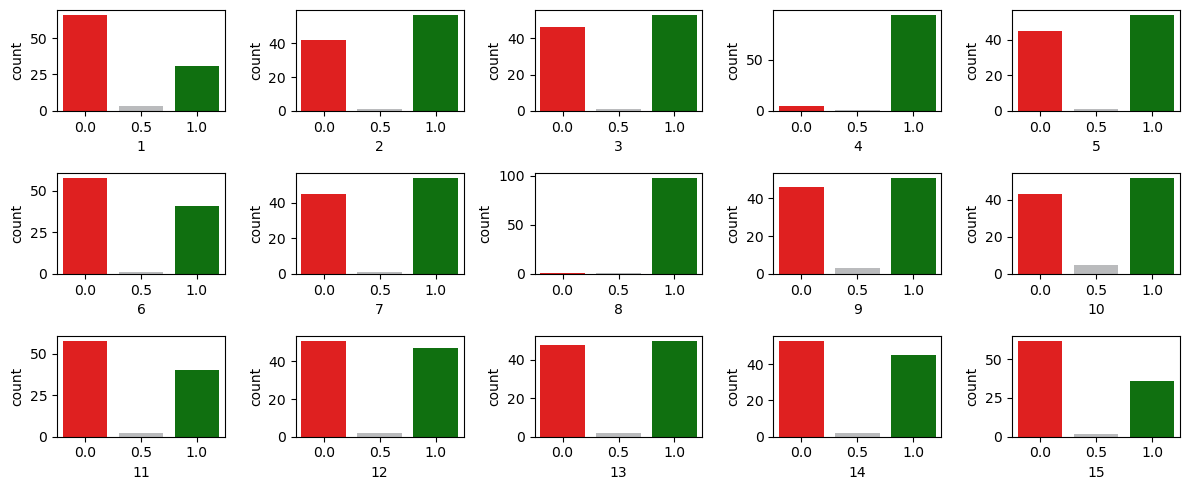

In [6]:
plt.figure(figsize = (12,5))

plot_num = df.columns[3:]

for i, column in enumerate(plot_num, start=1):
    plt.subplot(3, 5, i)
    sns.countplot(x = column, data = df, palette=['#ff0000', '#b9bbbe', '#008000'])
    

plt.tight_layout()
plt.show()

* Party composition

<AxesSubplot:xlabel='party', ylabel='count'>

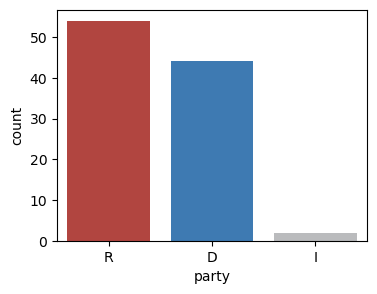

In [7]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'party', data = df, palette=['#c4342d', '#2b7ac5', '#b9bbbe'])

* Relationship between party and state

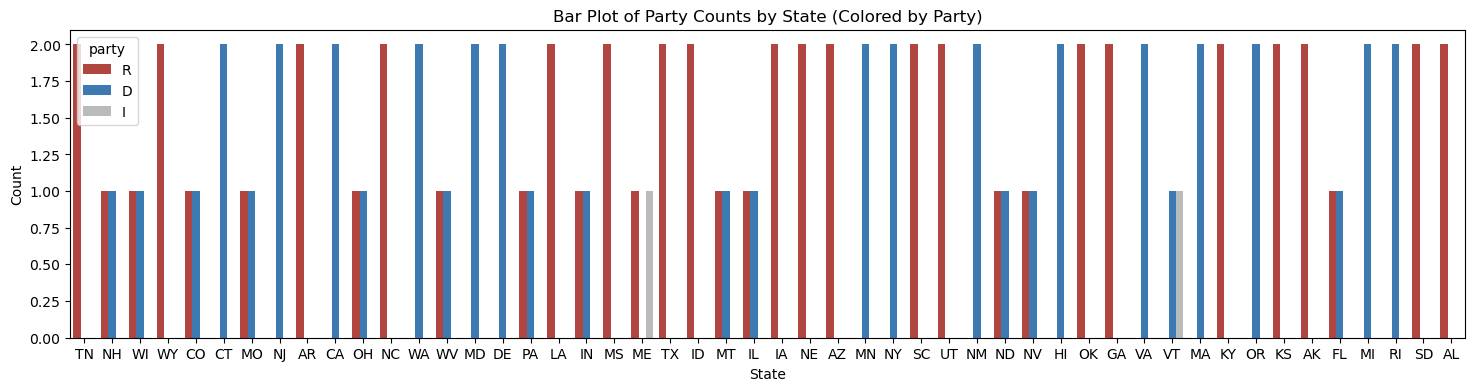

In [8]:
plt.figure(figsize = (18, 4))

# Create a bar plot with 'state' on the x-axis, 'party' as hue, and count as y
sns.countplot(data = df, x = 'state', hue = 'party', palette={'R': '#c4342d', 'D': '#2b7ac5', 'I': '#b9bbbe'})

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Bar Plot of Party Counts by State (Colored by Party)')

#plt.legend(title = 'Party', loc='upper right')  \

plt.show()

* party, state and vote result

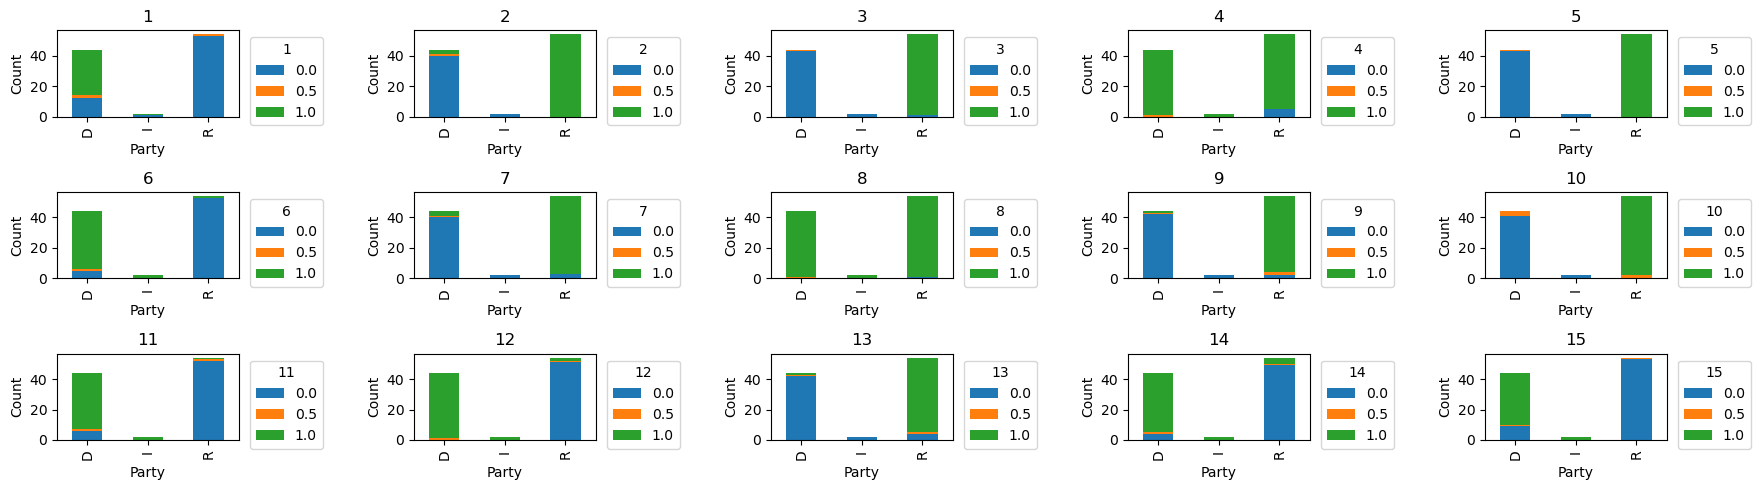

In [9]:
plt.figure(figsize=(18, 5))

plot_num = df.columns[3:]

for i, column in enumerate(plot_num, start=1):
    plt.subplot(3, 5, i)

    # Create a cross-tabulation (contingency table) of 'party' vs. the current column
    crosstab = pd.crosstab(df['party'], df[column])

    # Create a stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.xlabel('Party')
    plt.ylabel('Count')
    plt.title(column)
    plt.legend(title=column, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()

# Data Usage: Questions 

* Do certain parties/states tend to support specific bills?
* As a result, how many bills have passed, and what are they?
* Which bill is strongly approved or disapproved of by all parties?
* Can machine learning predict the voting results?

## 1) Do certain parties/states tend to support specific bills?

In [10]:
col = [str(i) for i in range(1, 16)]

sum_list = []

for column in col:
    # sum the approval result from each party
    sum_party = (df[column] == 1.0).groupby(df['party']).sum()
    # Append to the list
    sum_list.append(sum_party)

# Concatenate the sum_list df
count_df = pd.concat(sum_list, axis = 1)
print(count_df)

        1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
party                                                            
D      30   3   0  43   0  38   3  43   1   0  37  43   1  39  34
I       1   0   0   2   0   2   0   2   0   0   2   2   0   2   2
R       0  54  53  49  54   1  51  53  50  52   1   2  49   4   0


* Democratic Party agrees on: 1, 4, 6, 8, 11, 12, 14, 15
* Republican Party agrees on: 2, 3, 4, 5, 7, 8, 9, 10, 13
* Indipendent Party agrees on: 1, 4, 6, 8, 11, 12, 14, 15

In [11]:
col = [str(i) for i in range(1, 16)]

sum_list = []

for column in col:
    # sum the approval result from each party
    sum_state = (df[column] == 1.0).groupby(df['state']).sum()
    # Append to the list
    sum_list.append(sum_state)

# Concatenate the sum_list df
count_df = pd.concat(sum_list, axis = 1).reset_index()
#print(count_df) hard to tell the result, visualize it

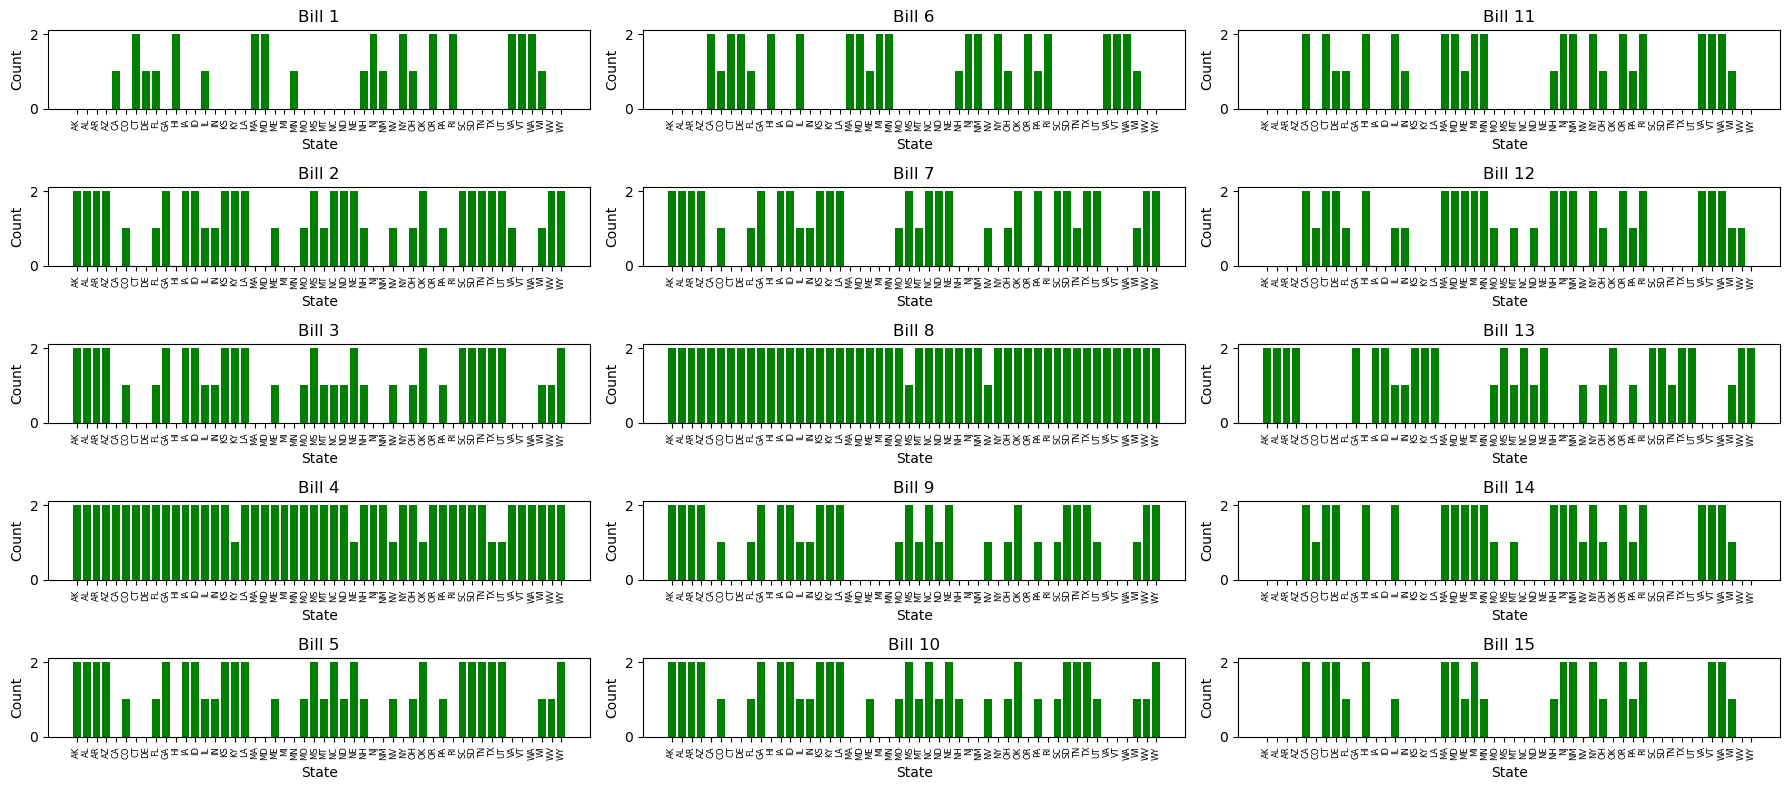

In [12]:
# Create a figure with subplots
fig, axs = plt.subplots(5, 3, figsize = (18, 8))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)  # Adjust spacing between subplots

# Iterate through the columns '1' to '15'
for i in range(1, 16):
    col = (i - 1) // 5  # col number (0 to 2)
    row = (i - 1) % 5   # row number (0 to 4)
    
    # Create a bar plot for the current column with a specific color (green in this case)
    axs[row, col].bar(count_df['state'], count_df[str(i)], color = '#008000')
    axs[row, col].set_title(f'Bill {i}')
    axs[row, col].set_xlabel('State')
    axs[row, col].set_ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.sca(axs[row, col])
    plt.xticks(rotation = 90, fontsize = 6.0)

plt.tight_layout()
plt.show()

* Vote as approval result is shown by bar plot above

## 2) As a result, how many bills have passed, and what are they?

In [13]:
# print out those bill with true (passed)
pass_bill = []

for i in range(1, 16):  
    condition = (df[str(i)] == 1).sum() > (df[str(i)] == 0).sum()#str in required for the relevant col
    if condition:
        pass_bill.append(i)
print(f'{len(pass_bill)} bills are passed and they are: {pass_bill}')

9 bills are passed and they are: [2, 3, 4, 5, 7, 8, 9, 10, 13]


## 3) Which bill is strongly approved or disapproved of by all parties?

In [14]:
#let's define strongly as 50% higher than another category of the result
# print out those bill with true (passed)
diff_bill = []

for i in range(1, 16):  
    one = (df[str(i)] == 1).sum() 
    zero = (df[str(i)] == 0).sum()
    
    if abs(one - zero) >= 0.5*(one+zero):
        diff_bill.append(i)
        
print(f'{len(diff_bill)} bills are passed and they are: {diff_bill}')

2 bills are passed and they are: [4, 8]


## 4) Can machine learning predict the voting results?

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [16]:
# preprocess party and state
label_encoder = LabelEncoder()

df['party'] = label_encoder.fit_transform(df['party'])

df['state'] = label_encoder.fit_transform(df['state'])

In [17]:
df_melted = pd.melt(df, id_vars = ['name', 'party', 'state'], var_name = 'bill', value_name = 'result')

df_melted

,name,party,state,bill,result
0,Alexander,2,41,1,0.0
1,Ayotte,2,29,1,0.0
2,Baldwin,0,47,1,1.0
3,Barrasso,2,49,1,0.0
4,Bennet,0,5,1,0.0
...,...,...,...,...,...
1495,Warner,0,44,15,0.0
1496,Warren,0,18,15,1.0
1497,Whitehouse,0,38,15,1.0
1498,Wicker,2,24,15,0.0


In [18]:
# create binary df
df_melted = df_melted[df_melted['result'] != 0.5]

In [19]:
# convert continuous to categorical
df_melted.loc[df_melted['result'] == 1.0, 'result'] = 1

df_melted.loc[df_melted['result'] == 0.0, 'result'] = 0

In [20]:
X = df_melted[['party', 'state', 'bill']]

y = df_melted[['result']]
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No, the state or party can not predict the voting result with good accuracy

# Preprocess data for Tableau

In [ ]:
df = pd.read_csv(r'/Users/lih-anhsu/Desktop/Sample_Project/Bill Voting Result/TEST.csv')

In [ ]:
#wide to long format
df_long = pd.melt(df, id_vars=['name', 'party', 'state'], var_name='bill', value_name='result')

In [ ]:
#df_long.to_csv(r'/Users/lih-anhsu/Desktop/Sample_Project/Bill Voting Result/long table.csv')